In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
application_data=pd.read_csv("/content/application_data.csv")

In [ ]:
previous_application_data=pd.read_csv("/content/previous_application.csv")

In [ ]:
application_data.shape

(49999, 122)

In [ ]:
previous_application_data.shape

(49999, 37)

In [ ]:
# Calculate the percentage of missing values for each column in application_data
application_data_missing = (application_data.isnull().sum() / len(application_data)) * 100

# Calculate the percentage of missing values for each column in previous_application
previous_application_missing = (previous_application_data.isnull().sum() / len(previous_application_data)) * 100

# Count the number of columns with missing values in each dataframe
total_missing_columns_application_data = application_data_missing[application_data_missing > 0].count()
total_missing_columns_previous_application = previous_application_missing[previous_application_missing > 0].count()

# Calculate the percentage of columns with missing values in each dataframe
percentage_missing_columns_application_data = (total_missing_columns_application_data / len(application_data.columns)) * 100
percentage_missing_columns_previous_application = (total_missing_columns_previous_application / len(previous_application_data.columns)) * 100

# Print the results
print(f"Total columns with missing values in application data: {total_missing_columns_application_data} ({percentage_missing_columns_application_data:.2f}%)")
print(f"Total columns with missing values in Previous_Application: {total_missing_columns_previous_application} ({percentage_missing_columns_previous_application:.2f}%)")


Total columns with missing values in application data: 67 (54.92%)
Total columns with missing values in Previous_Application: 15 (40.54%)


In [ ]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.00000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,...,0.008500,0.000700,0.000520,0.00038,0.007096,0.007512,0.032382,0.270288,0.260973,1.881035
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.944435,3.698533e+05,0.013761,4361.400270,140794.605668,...,0.091805,0.026449,0.022798,0.01949,0.087709,0.107992,0.194080,0.928560,0.606996,1.865054
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25184.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19644.000000,-2786.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15731.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12378.500000,-292.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.00000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [ ]:
previous_application_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,4.999900e+04,49999.000000,39407.000000,4.999900e+04,4.999900e+04,2.480100e+04,3.925500e+04,49999.000000,49999.000000,24801.000000,...,165.000000,49999.000000,4.999900e+04,39407.000000,30839.000000,30839.000000,30839.000000,30839.000000,30839.000000,30839.000000
mean,1.922254e+06,278983.187604,15482.596847,1.688925e+05,1.885429e+05,6.557571e+03,2.151414e+05,12.478330,0.996500,0.079083,...,0.787674,-900.112622,4.016558e+02,15.555891,344485.142806,14217.240150,31528.148611,76724.982101,81666.162586,0.322352
std,5.351980e+05,102780.124434,14530.971854,2.822035e+05,3.084736e+05,1.744458e+04,3.024993e+05,3.333012,0.059058,0.107658,...,0.091985,786.531303,1.793772e+04,13.985174,84683.650627,73348.984383,103691.881189,149757.893750,153101.159809,0.467384
min,1.000001e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.424419,-2922.000000,-1.000000e+00,0.000000,-2910.000000,-2891.000000,-2800.000000,-2850.000000,-2844.000000,0.000000
25%,1.457920e+06,189919.500000,6122.835000,2.204550e+04,2.605500e+04,0.000000e+00,4.941000e+04,10.000000,1.000000,0.000000,...,0.715645,-1335.000000,-1.000000e+00,6.000000,365243.000000,-1642.000000,-1270.000000,-1337.000000,-1293.000000,0.000000
50%,1.920889e+06,279264.000000,10879.920000,7.155000e+04,7.890750e+04,1.566000e+03,1.040175e+05,12.000000,1.000000,0.049732,...,0.835095,-599.000000,1.000000e+01,12.000000,365243.000000,-822.000000,-366.000000,-536.000000,-500.000000,0.000000
75%,2.388632e+06,368527.500000,19669.140000,1.800000e+05,1.981058e+05,7.875000e+03,2.250000e+05,15.000000,1.000000,0.108909,...,0.852537,-292.000000,1.000000e+02,18.000000,365243.000000,-404.000000,113.000000,-71.000000,-45.000000,1.000000
max,2.845367e+06,456254.000000,234478.395000,3.826372e+06,4.104351e+06,1.035000e+06,3.826372e+06,23.000000,1.000000,0.944776,...,0.867336,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


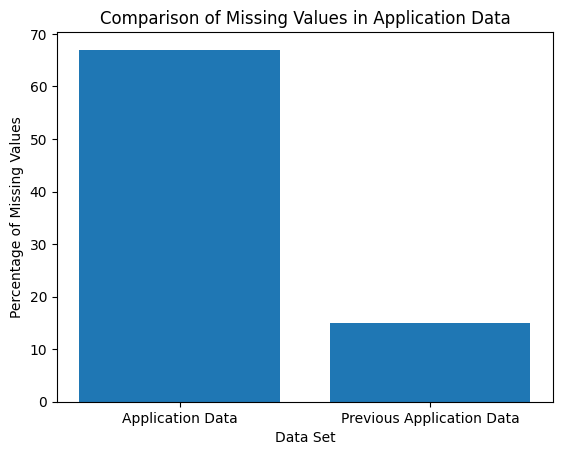

In [ ]:
import matplotlib.pyplot as plt

# Data
application_data_missing_values = 67
previous_application_data_missing_values = 15

# Create a bar chart
plt.bar(['Application Data', 'Previous Application Data'], [application_data_missing_values, previous_application_data_missing_values])

# Add labels and title
plt.xlabel('Data Set')
plt.ylabel('Percentage of Missing Values')
plt.title('Comparison of Missing Values in Application Data')

# Show the plot
plt.show()


<ipython-input-10-cbeba756840e>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = application_data.corr()


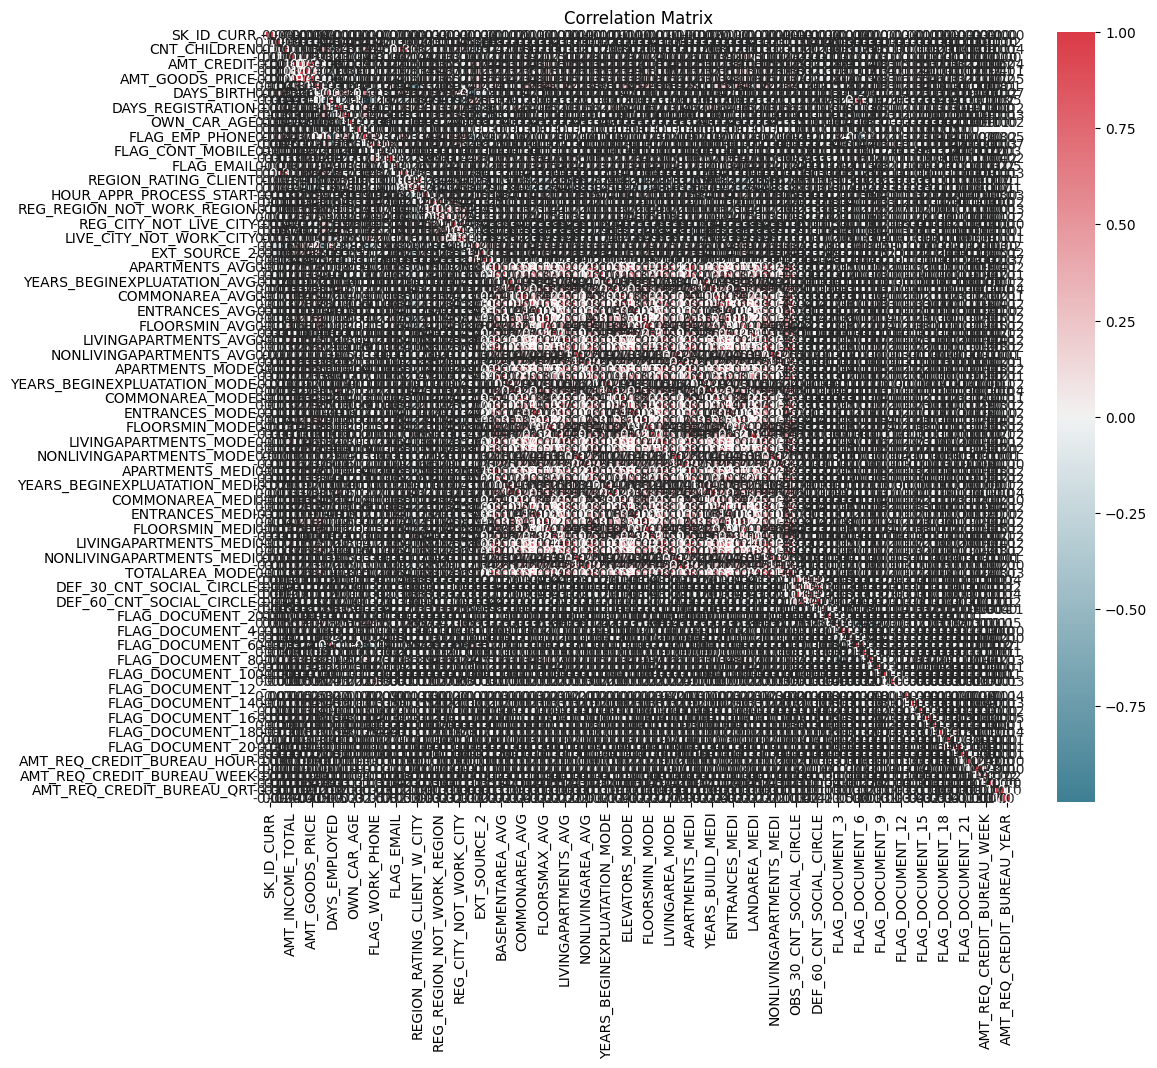

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'application_data'

# Calculate the correlation matrix between all numeric columns and 'TARGET'
correlation_matrix = application_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Define a custom color map to highlight low correlations in a distinct color
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap of the correlation matrix using the custom color map
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()


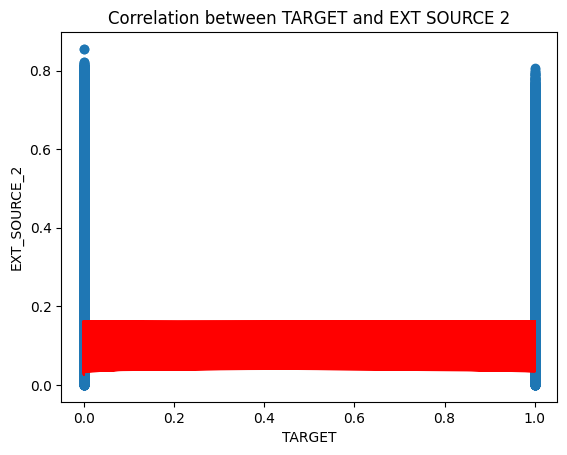

In [ ]:
# Calculate the correlation coefficient
correlation =application_data['TARGET'].corr(application_data['EXT_SOURCE_2'])

# Create a scatter plot
plt.scatter(application_data['TARGET'], application_data['EXT_SOURCE_2'])

# Add a trendline
plt.plot(application_data['TARGET'], application_data['EXT_SOURCE_2'] * correlation + application_data['TARGET'].mean() - application_data['EXT_SOURCE_2'].mean() * correlation, color='red')

# Add labels and title
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_2')
plt.title('Correlation between TARGET and EXT SOURCE 2')

# Show the plot
plt.show()


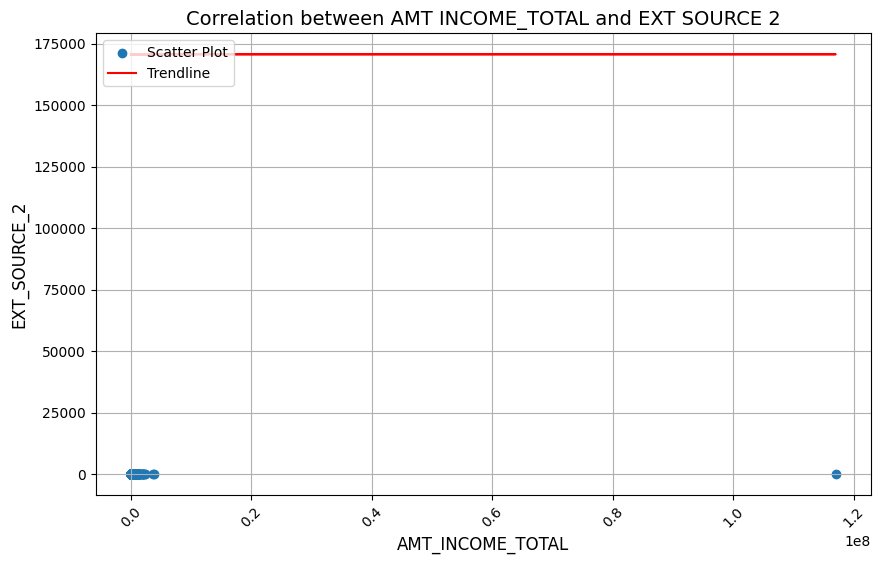

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/application_data.csv')

# Calculate the correlation coefficient
correlation = df['AMT_INCOME_TOTAL'].corr(df['EXT_SOURCE_2'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AMT_INCOME_TOTAL'], df['EXT_SOURCE_2'])

# Add a trendline
plt.plot(df['AMT_INCOME_TOTAL'], df['EXT_SOURCE_2'] * correlation + df['AMT_INCOME_TOTAL'].mean() - df['EXT_SOURCE_2'].mean() * correlation, color='red')

# Add a grid
plt.grid(True)

# Add labels and title
plt.xlabel('AMT_INCOME_TOTAL', fontsize=12)
plt.ylabel('EXT_SOURCE_2', fontsize=12)
plt.title('Correlation between AMT INCOME_TOTAL and EXT SOURCE 2', fontsize=14)

# Add a legend
plt.legend(['Scatter Plot', 'Trendline'], loc='upper left', fontsize=10)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


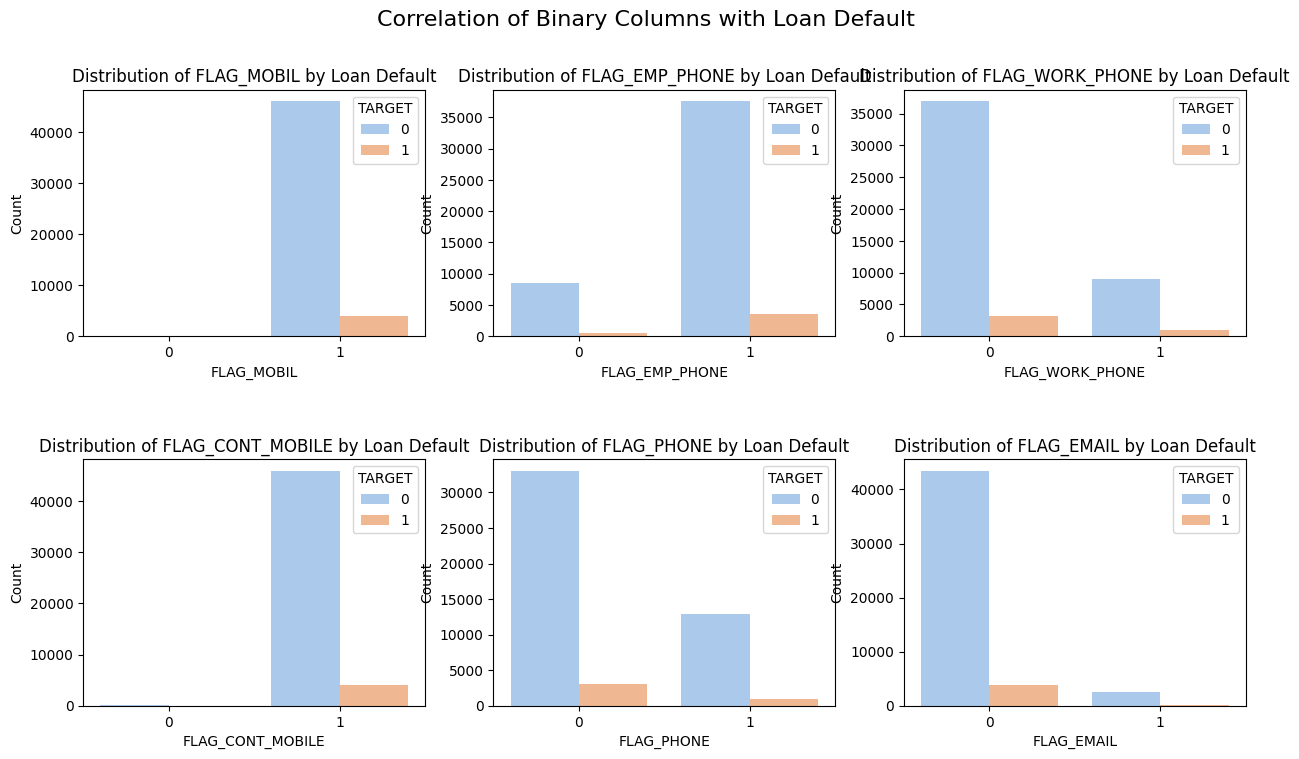

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of columns to analyze
columns_to_analyze = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_analyze):
    # Create a grouped bar chart
    sns.countplot(data=application_data, x=column, hue='TARGET', ax=axes[i // 3, i % 3], palette='pastel')
    axes[i // 3, i % 3].set_xlabel(column)
    axes[i // 3, i % 3].set_ylabel('Count')
    axes[i // 3, i % 3].set_title(f'Distribution of {column} by Loan Default')

# Add a title to the overall figure
fig.suptitle('Correlation of Binary Columns with Loan Default', fontsize=16)
plt.show()


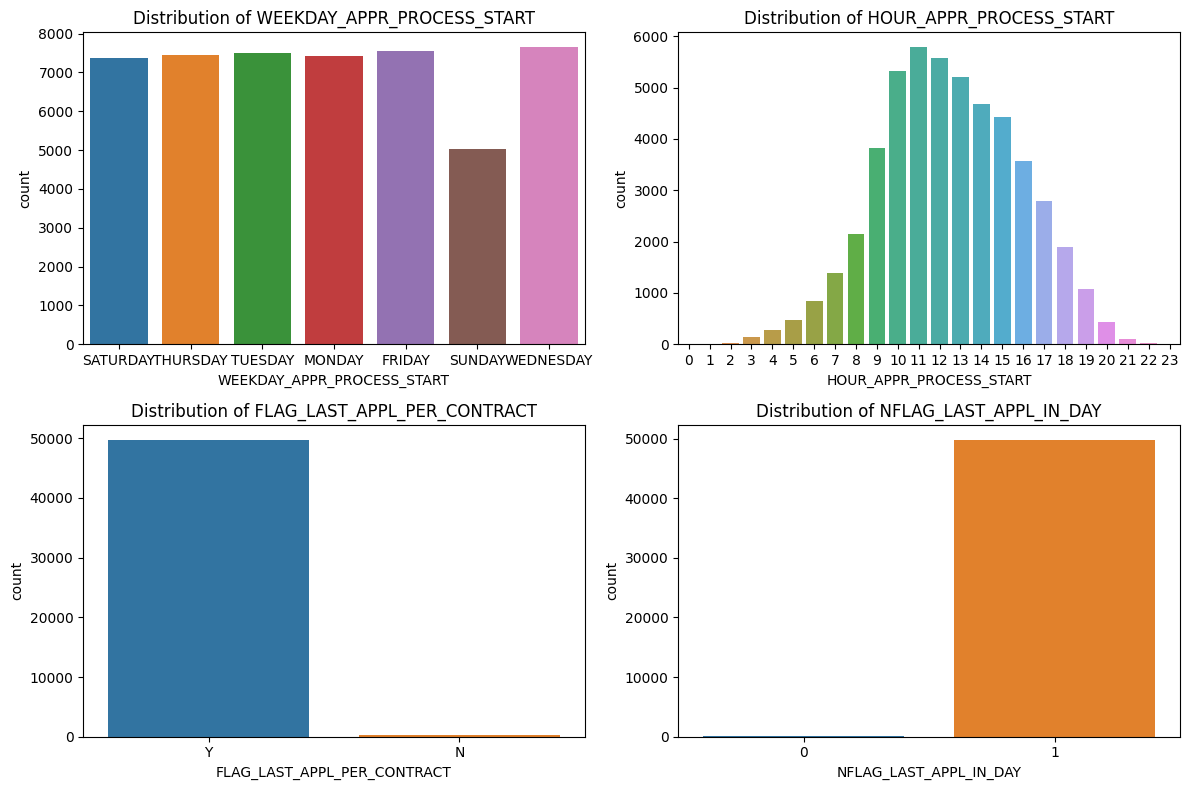

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each of the columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot WEEKDAY_APPR_PROCESS_START
sns.countplot(data=previous_application_data, x='WEEKDAY_APPR_PROCESS_START', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of WEEKDAY_APPR_PROCESS_START')

# Plot HOUR_APPR_PROCESS_START
sns.countplot(data=previous_application_data, x='HOUR_APPR_PROCESS_START', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of HOUR_APPR_PROCESS_START')

# Plot FLAG_LAST_APPL_PER_CONTRACT
sns.countplot(data=previous_application_data, x='FLAG_LAST_APPL_PER_CONTRACT', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of FLAG_LAST_APPL_PER_CONTRACT')

# Plot NFLAG_LAST_APPL_IN_DAY
sns.countplot(data=previous_application_data, x='NFLAG_LAST_APPL_IN_DAY', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of NFLAG_LAST_APPL_IN_DAY')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Condition 4: Drop specified columns in application_data
columns_to_drop_application = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                               'FLAG_PHONE', 'FLAG_EMAIL'] + [f'FLAG_DOCUMENT_{i}' for i in range(2, 15)]
application_data.drop(columns=columns_to_drop_application, inplace=True)

# Condition 5: Drop specified columns in previous_application
columns_to_drop_previous = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                            'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
previous_application_data.drop(columns=columns_to_drop_previous, inplace=True)

In [ ]:
application_data.shape

(49999, 103)

In [ ]:
previous_application_data.shape

(49999, 33)

In [ ]:
# Find and count null values in Application_Data
null_counts_application = application_data.isnull().sum()

# Find and count null values in Previous_Application
null_counts_previous = previous_application_data.isnull().sum()

# Drop columns with null values from Application_Data
application_data_cleaned = application_data.dropna(axis=1)

# Drop columns with null values from Previous_Application
previous_application_cleaned = previous_application_data.dropna(axis=1)

# Print the shape of cleaned datasets
print("Shape of Application_Data after dropping null columns:", application_data_cleaned.shape)
print("Shape of Previous_Application after dropping null columns:", previous_application_cleaned.shape)


Shape of Application_Data after dropping null columns: (49999, 36)
Shape of Previous_Application after dropping null columns: (49999, 18)


In [ ]:
#Convert negative days columns into positive days
days_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for col in days_columns:
    application_data[col] = application_data[col].abs()

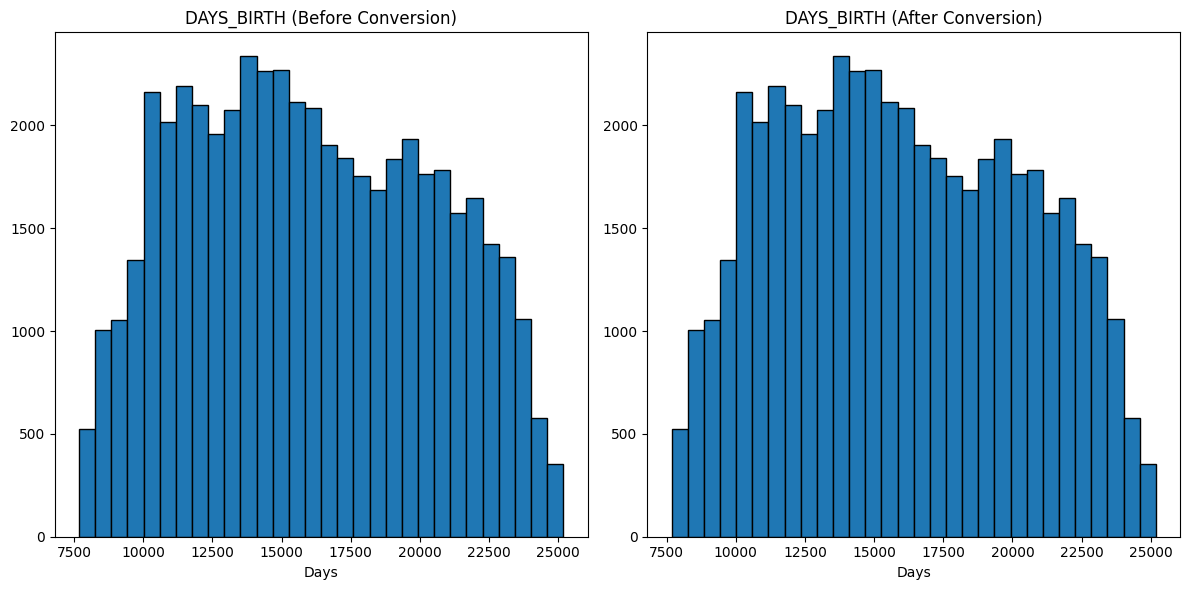

In [ ]:
import matplotlib.pyplot as plt

# Before converting to positive days
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(application_data['DAYS_BIRTH'], bins=30, edgecolor='k')
plt.title('DAYS_BIRTH (Before Conversion)')
plt.xlabel('Days')

# Convert to positive days
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].abs()

# After converting to positive days
plt.subplot(1, 2, 2)
plt.hist(application_data['DAYS_BIRTH'], bins=30, edgecolor='k')
plt.title('DAYS_BIRTH (After Conversion)')
plt.xlabel('Days')

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd


# Impute missing values for numerical columns with median
numerical_cols = application_data.select_dtypes(include=['number']).columns
application_data[numerical_cols] = application_data[numerical_cols].fillna(application_data[numerical_cols].median())

# Impute missing values for categorical columns with mode
categorical_cols = application_data.select_dtypes(include=['object']).columns
application_data[categorical_cols] = application_data[categorical_cols].fillna(application_data[categorical_cols].mode().iloc[0])

# Verify that all missing values have been imputed
missing_values = application_data.isnull().sum()
print("Remaining Missing Values:")
print(missing_values)

# Check the shape of the DataFrame
print("Shape of DataFrame after Imputation:", application_data.shape)


Remaining Missing Values:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 103, dtype: int64
Shape of DataFrame after Imputation: (49999, 103)


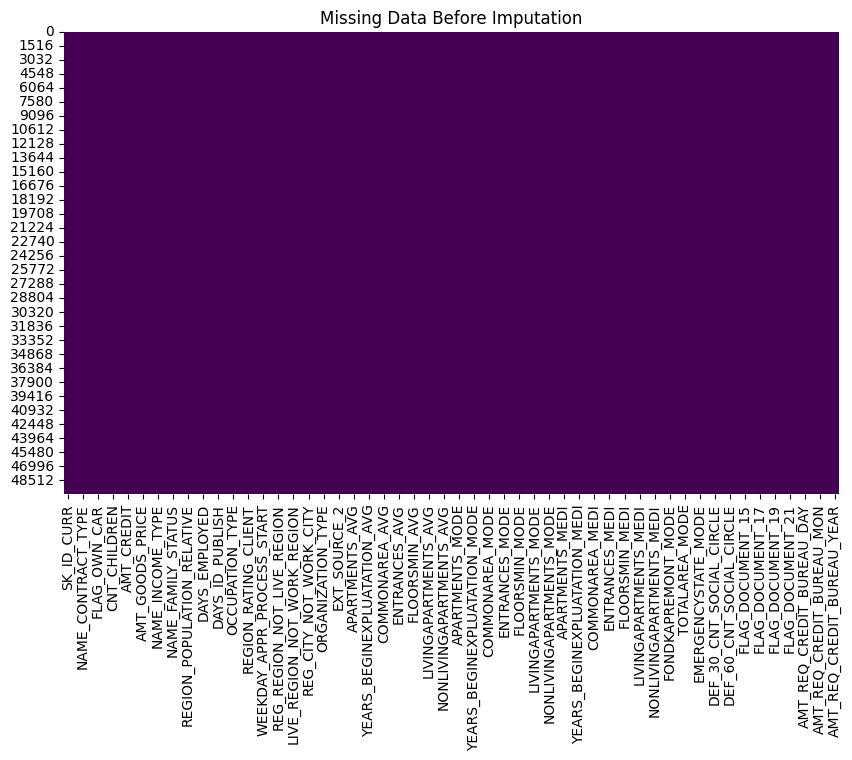

Remaining Missing Values:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 103, dtype: int64
Shape of DataFrame after Imputation: (49999, 103)


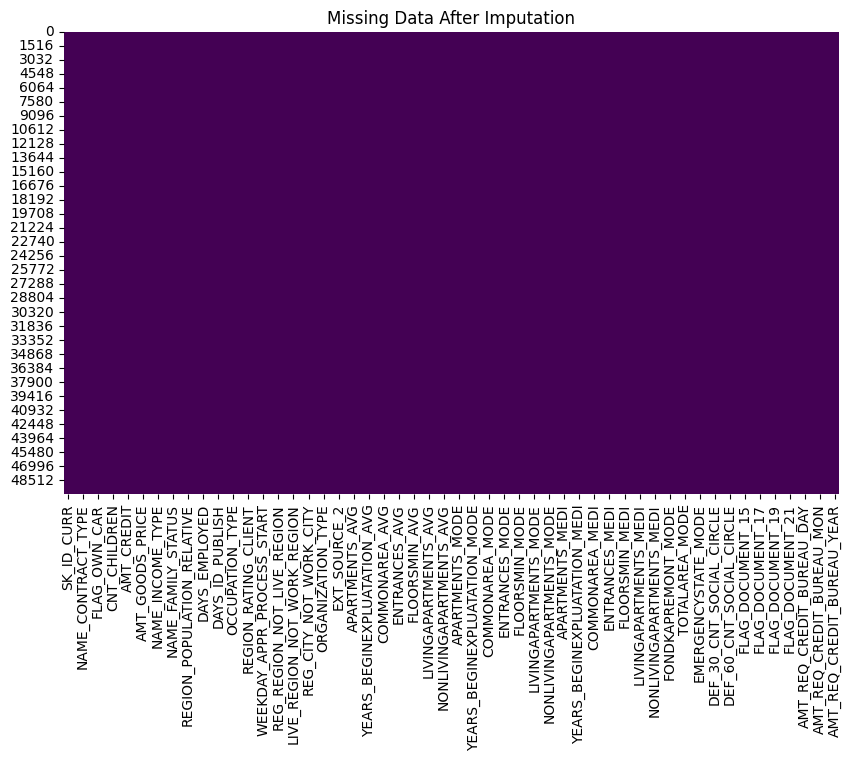

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'application_data' is your DataFrame
# Create a heatmap to visualize missing data before imputation
plt.figure(figsize=(10, 6))
sns.heatmap(application_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Before Imputation')
plt.show()

# Impute missing values (as shown in the previous code)
# ...
numerical_cols = application_data.select_dtypes(include=['number']).columns
application_data[numerical_cols] = application_data[numerical_cols].fillna(application_data[numerical_cols].median())

# Impute missing values for categorical columns with mode
categorical_cols = application_data.select_dtypes(include=['object']).columns
application_data[categorical_cols] = application_data[categorical_cols].fillna(application_data[categorical_cols].mode().iloc[0])

# Verify that all missing values have been imputed
missing_values = application_data.isnull().sum()
print("Remaining Missing Values:")
print(missing_values)

# Check the shape of the DataFrame
print("Shape of DataFrame after Imputation:", application_data.shape)
# Create a heatmap to visualize missing data after imputation
plt.figure(figsize=(10, 6))
sns.heatmap(application_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Imputation')
plt.show()


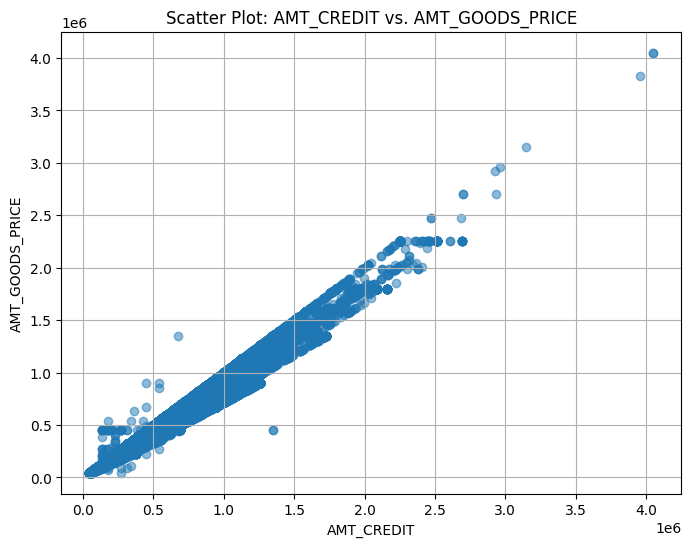

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(application_data['AMT_CREDIT'], application_data['AMT_GOODS_PRICE'], alpha=0.5)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Scatter Plot: AMT_CREDIT vs. AMT_GOODS_PRICE')
plt.grid(True)
plt.show()


In [ ]:
# Convert specific columns to integer
int_columns = ['CNT_FAM_MEMBERS', 'DAYS_REGISTRATION']

for col in int_columns:
    application_data[col] = application_data[col].astype(int)

# Ensure values in object-type columns are in string format
object_columns = application_data.select_dtypes(include=['object']).columns

for col in object_columns:
    application_data[col] = application_data[col].astype(str)


In [ ]:
print(application_data['DAYS_BIRTH'])


0         9461
1        16765
2        19046
3        19005
4        19932
         ...  
49994    10667
49995    20211
49996    10280
49997    23485
49998    19251
Name: DAYS_BIRTH, Length: 49999, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two numerical columns for the scatter plot
x = application_data['AMT_INCOME_TOTAL']
y =application_data['AMT_CREDIT']

# Calculate the IQR (Interquartile Range) for both columns
Q1_x = x.quantile(0.25)
Q3_x = x.quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = y.quantile(0.25)
Q3_y = y.quantile(0.75)
IQR_y = Q3_y - Q1_y

# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
outlier_threshold_x = 1.5 * IQR_x
outlier_threshold_y = 1.5 * IQR_y

# Identify outliers for both columns
outliers_x = (x < Q1_x - outlier_threshold_x) | (x > Q3_x + outlier_threshold_x)
outliers_y = (y < Q1_y - outlier_threshold_y) | (y > Q3_y + outlier_threshold_y)

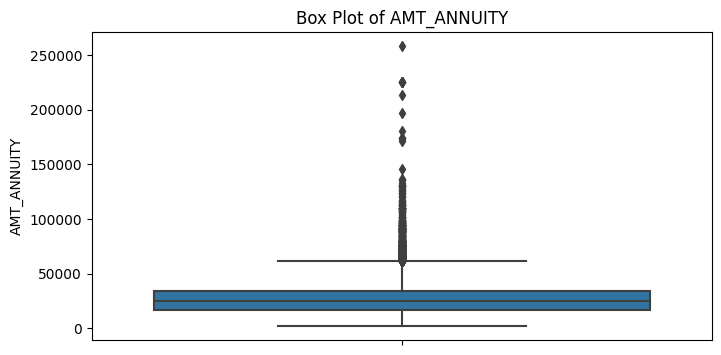

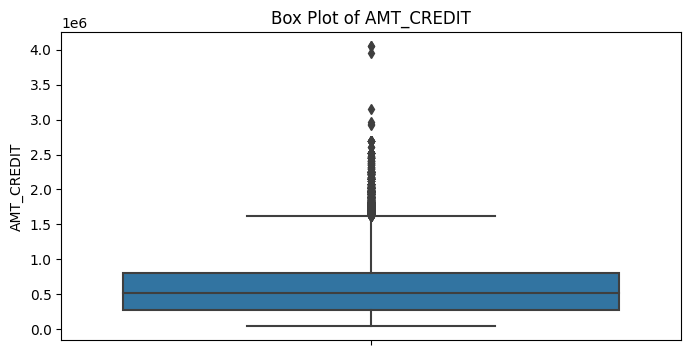

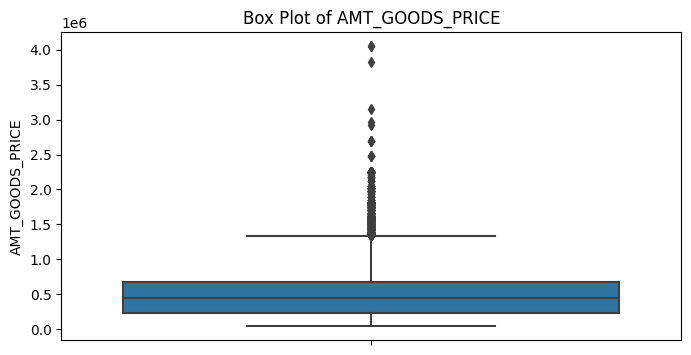

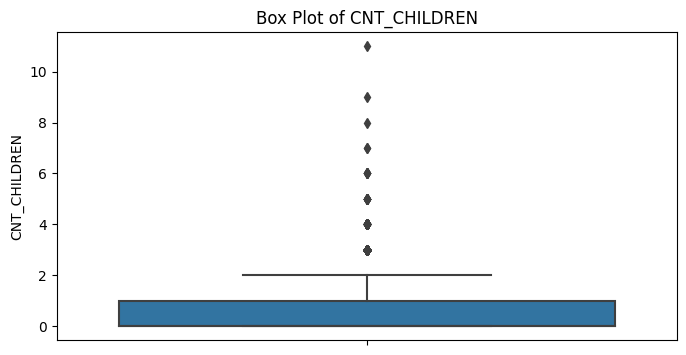

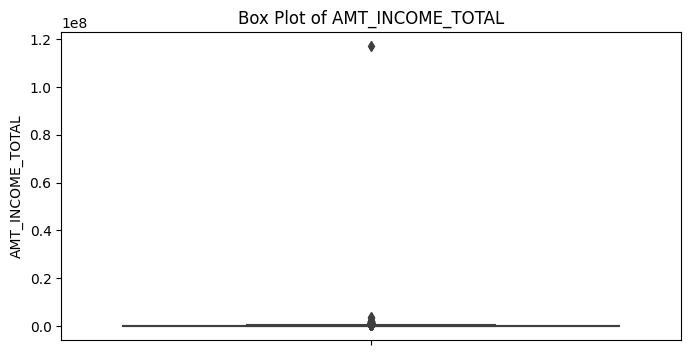

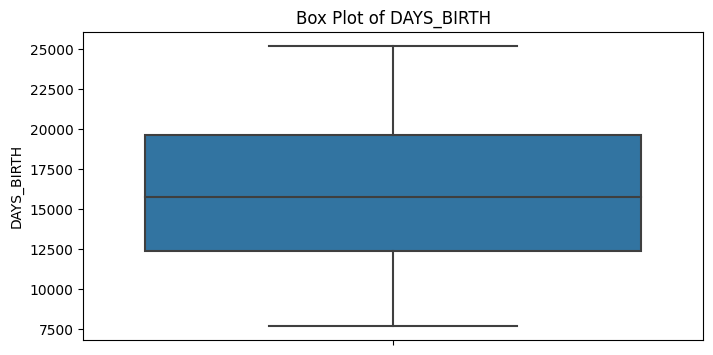

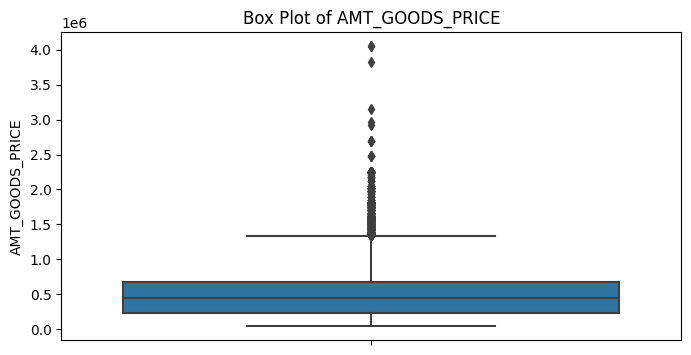

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns with potential outliers
columns_with_outliers = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','AMT_GOODS_PRICE']

# Create a function to visualize outliers with horizontal box plots
def visualize_outliers(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

# Call the function to visualize outliers in the specified columns
visualize_outliers(application_data, columns_with_outliers)

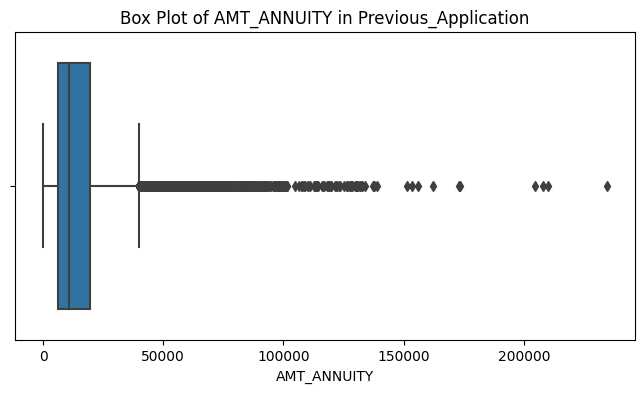

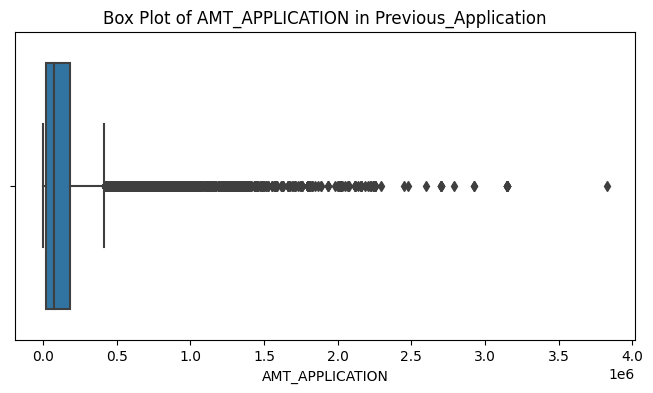

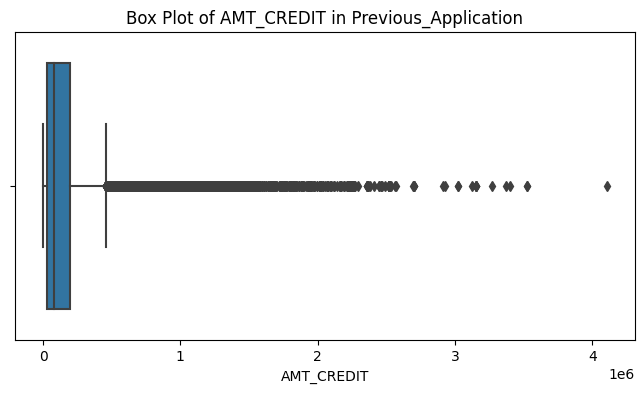

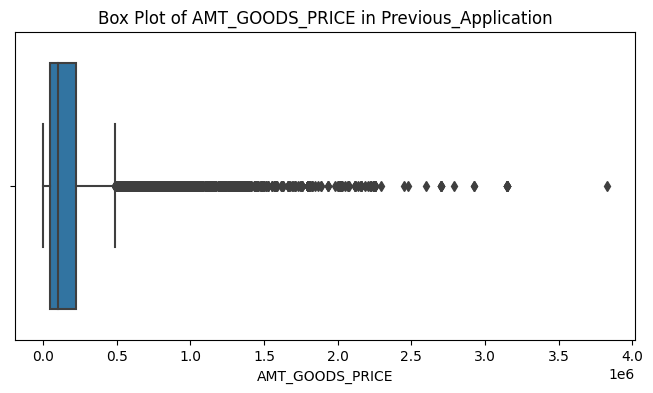

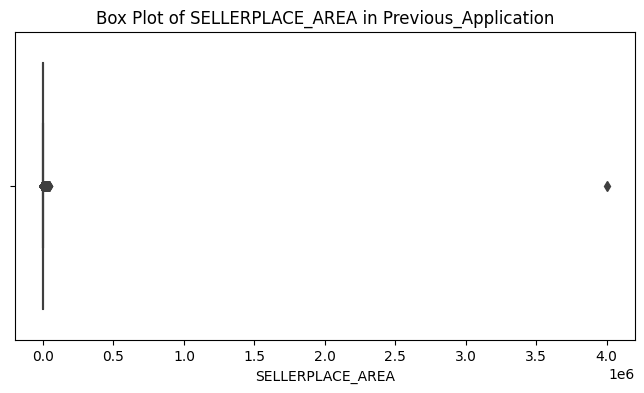

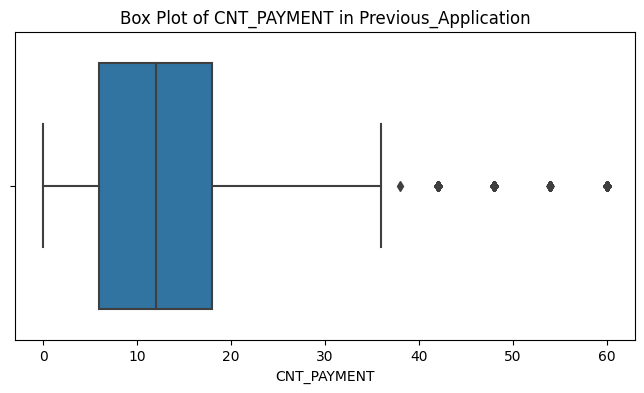

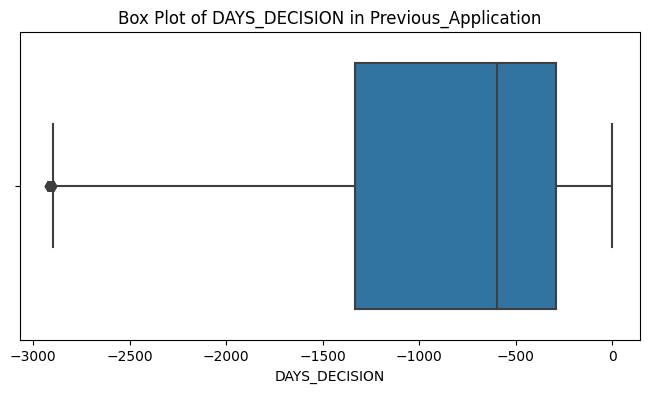

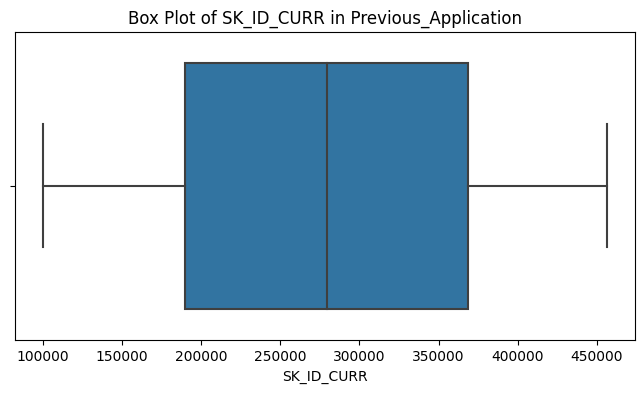

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns with potential outliers in previous_application
columns_with_outliers_prev = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_DECISION','SK_ID_CURR']

# Create a function to visualize outliers with rotated x-axis labels
def visualize_outliers_previous(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column} in Previous_Application')
        plt.xlabel(column)

        # Rotate x-axis labels to be horizontal
        plt.xticks(rotation=0)

        plt.show()

# Call the function to visualize outliers in the specified columns with rotated labels
visualize_outliers_previous(previous_application_data, columns_with_outliers_prev)


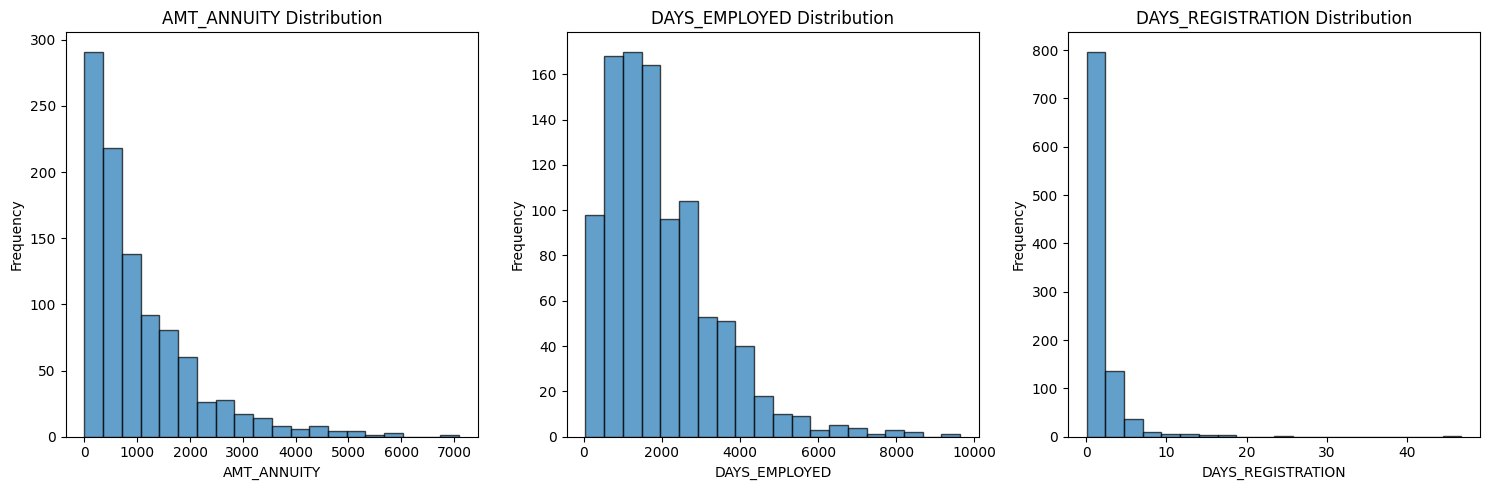

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your own data)
amt_annuity_data = np.random.exponential(scale=1000, size=1000)  # Example data with skewness
days_employed_data = np.random.gamma(shape=2, scale=1000, size=1000)  # Example data with skewness
days_registration_data = np.random.lognormal(mean=0, sigma=1, size=1000)  # Example data with skewness

# Create subplots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms with custom bins
bins = 20  # Adjust the number of bins as needed

# Plot AMT_ANNUITY
axes[0].hist(amt_annuity_data, bins=bins, edgecolor='k', alpha=0.7)
axes[0].set_xlabel('AMT_ANNUITY')
axes[0].set_ylabel('Frequency')
axes[0].set_title('AMT_ANNUITY Distribution')

# Plot DAYS_EMPLOYED
axes[1].hist(days_employed_data, bins=bins, edgecolor='k', alpha=0.7)
axes[1].set_xlabel('DAYS_EMPLOYED')
axes[1].set_ylabel('Frequency')
axes[1].set_title('DAYS_EMPLOYED Distribution')

# Plot DAYS_REGISTRATION
axes[2].hist(days_registration_data, bins=bins, edgecolor='k', alpha=0.7)
axes[2].set_xlabel('DAYS_REGISTRATION')
axes[2].set_ylabel('Frequency')
axes[2].set_title('DAYS_REGISTRATION Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


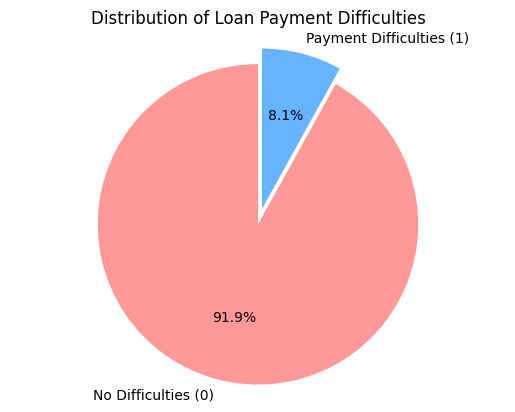

Distribution of the Target Variable:
0    45973
1     4026
Name: TARGET, dtype: int64

Imbalance Ratio (1s to 0s): 0.09


In [ ]:
# Assuming your target variable is named 'TARGET' (1 for payment difficulties, 0 for no difficulties)
target_variable = 'TARGET'

# Calculate the distribution of the target variable
target_distribution = application_data[target_variable].value_counts()

# Calculate the ratio of data imbalance
imbalance_ratio = target_distribution[1] / target_distribution[0]

# Create a pie chart to visualize the distribution
labels = ['No Difficulties (0)', 'Payment Difficulties (1)']
sizes = target_distribution.values
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice (Payment Difficulties)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Distribution of Loan Payment Difficulties')
plt.show()

# Print the distribution and imbalance ratio
print("Distribution of the Target Variable:")
print(target_distribution)

print("\nImbalance Ratio (1s to 0s): {:.2f}".format(imbalance_ratio))


In [ ]:
import pandas as pd

# Load your loan application dataset

application_data = pd.read_csv('/content/application_data.csv')

# Assuming your target variable is named 'TARGET' (1 for payment difficulties, 0 for no difficulties)
target_variable = 'TARGET'

# Calculate the distribution of the target variable
target_distribution = application_data[target_variable].value_counts(normalize=True) * 100

# Calculate the data imbalance percentage
defaulter_percentage = target_distribution[1]
non_defaulter_percentage = target_distribution[0]

# Print the data imbalance percentages
print("Percentage of Defaulters: {:.2f}%".format(defaulter_percentage))
print("Percentage of Non-Defaulters: {:.2f}%".format(non_defaulter_percentage))

# Verify if there is significant data imbalance
if defaulter_percentage > 60:
    print("There is a significant data imbalance where {:.2f}% of the data corresponds to Defaulters.".format(defaulter_percentage))
    print("This indicates an imbalance in the dataset.")
else:
    print("The data is relatively balanced.")


Percentage of Defaulters: 8.05%
Percentage of Non-Defaulters: 91.95%
The data is relatively balanced.


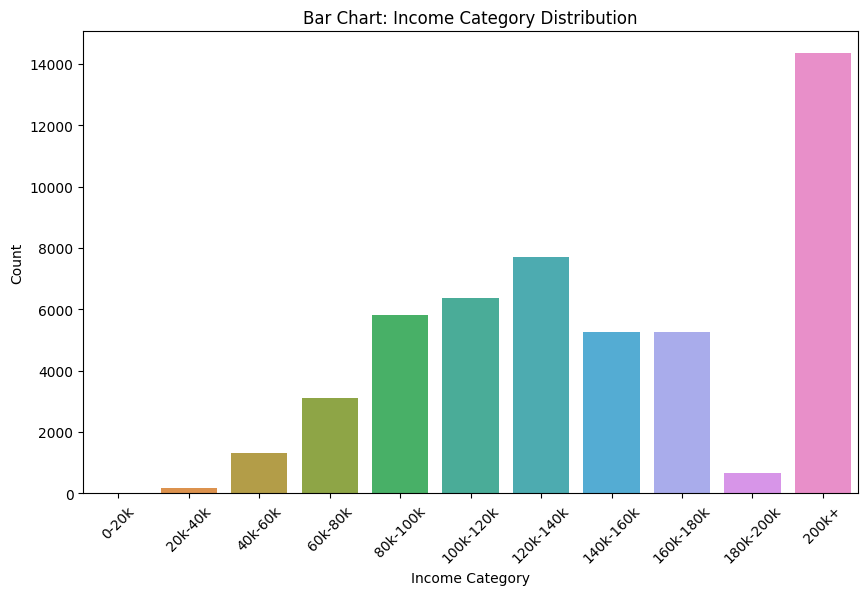

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the application_data.csv
application_data = pd.read_csv('application_data.csv')

# Define income categories
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k', '200k+']

# Create a new categorical column for income categories
application_data['INCOME_CATEGORY'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create a bar chart for income categories
plt.figure(figsize=(10, 6))
sns.countplot(data=application_data, x='INCOME_CATEGORY', order=income_labels)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Bar Chart: Income Category Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


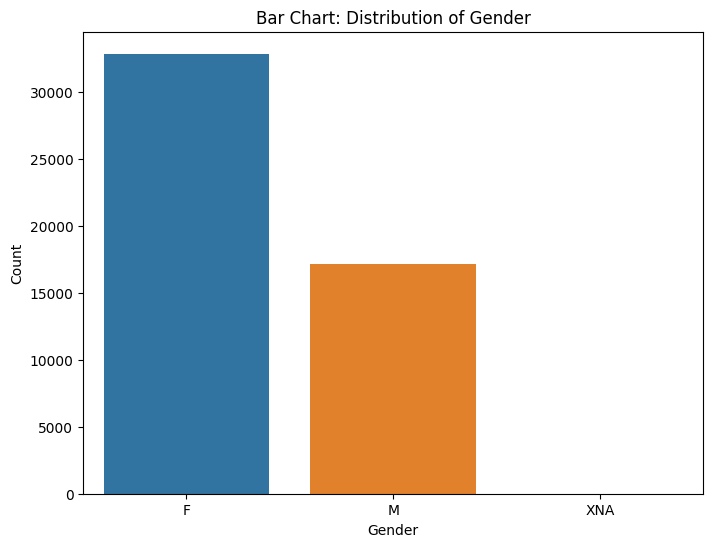

In [ ]:
# Univariate analysis of gender (CODE_GENDER)
plt.figure(figsize=(8, 6))
sns.countplot(data=application_data, x='CODE_GENDER', order=application_data['CODE_GENDER'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Gender')
plt.show()

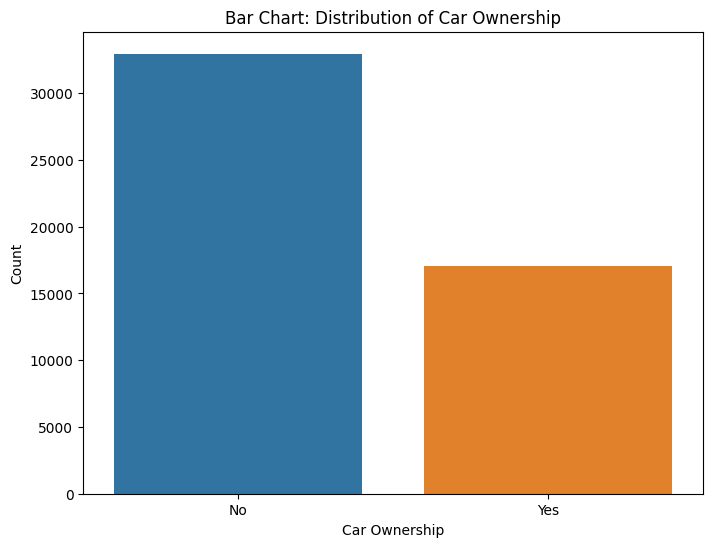

In [ ]:
# Univariate analysis of car ownership (FLAG_OWN_CAR)
plt.figure(figsize=(8, 6))
sns.countplot(data=application_data, x='FLAG_OWN_CAR', order=application_data['FLAG_OWN_CAR'].value_counts().index)
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Car Ownership')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

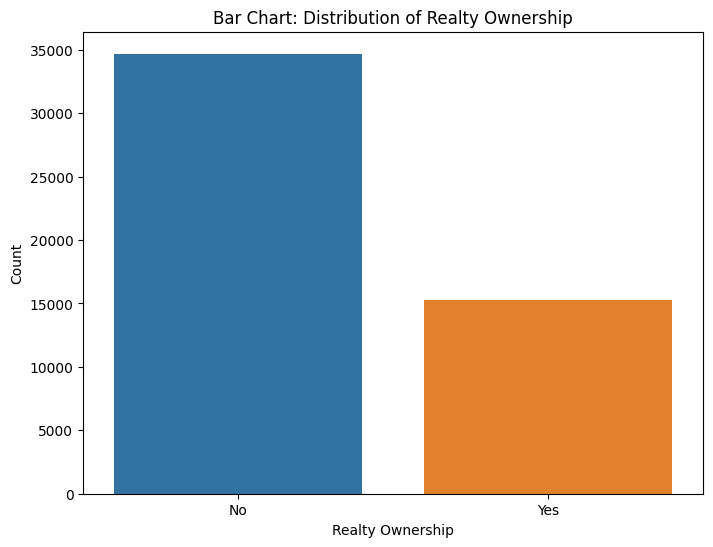

In [ ]:
# Univariate analysis of realty ownership (FLAG_OWN_REALTY)
plt.figure(figsize=(8, 6))
sns.countplot(data=application_data, x='FLAG_OWN_REALTY', order=application_data['FLAG_OWN_REALTY'].value_counts().index)
plt.xlabel('Realty Ownership')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Realty Ownership')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

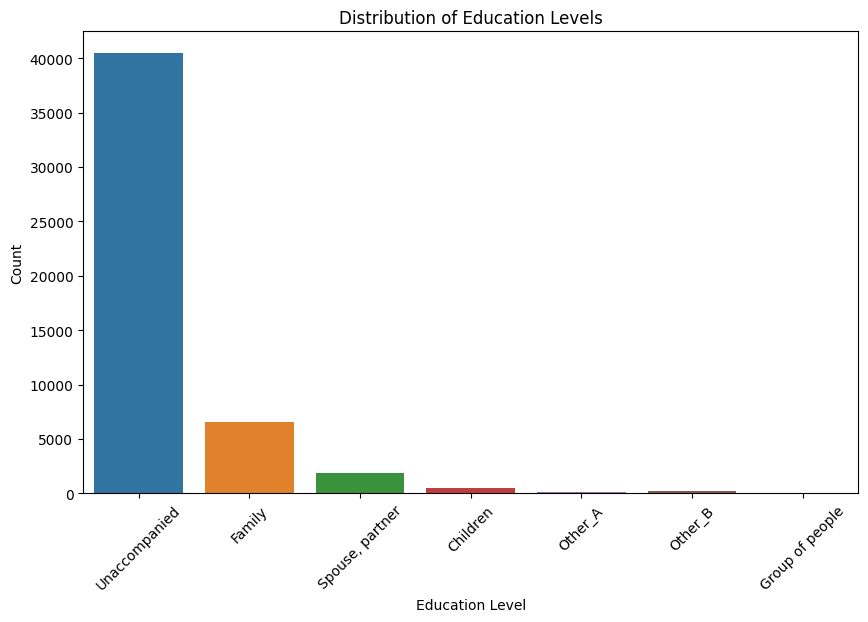

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=application_data, x='NAME_TYPE_SUITE')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)
plt.show()

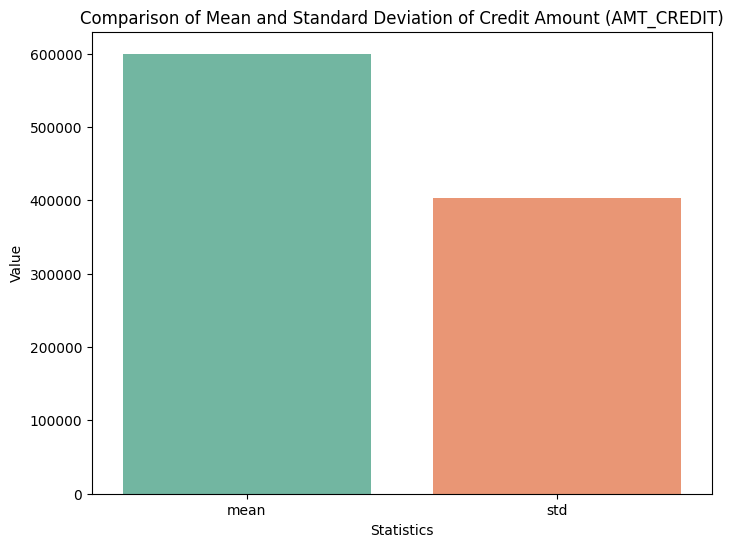

In [ ]:
# Calculate mean and standard deviation of 'AMT_CREDIT'
credit_stats = application_data['AMT_CREDIT'].agg(['mean', 'std'])

# Create a bar chart to visualize the statistics
plt.figure(figsize=(8, 6))
sns.barplot(x=credit_stats.index, y=credit_stats.values, palette='Set2')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Comparison of Mean and Standard Deviation of Credit Amount (AMT_CREDIT)')
plt.show()

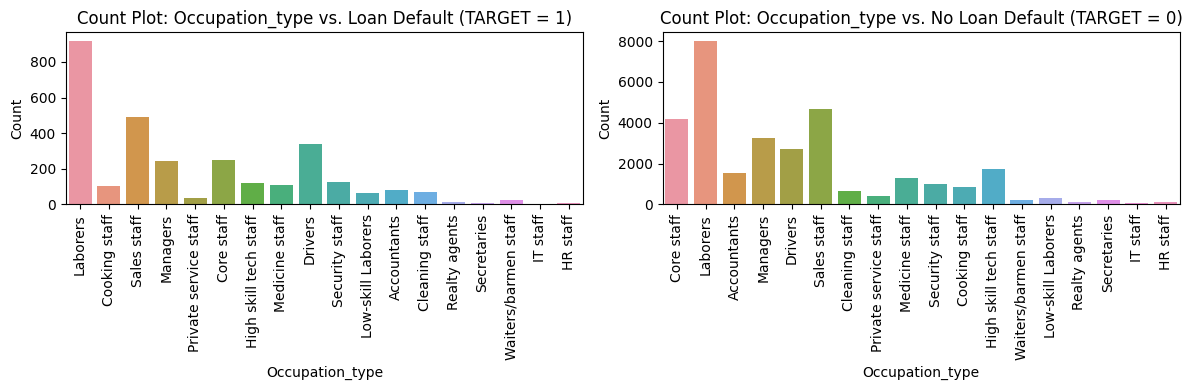

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0])
axes[0].set_xlabel('Occupation_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Occupation_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 0], x='OCCUPATION_TYPE', ax=axes[1])
axes[1].set_xlabel('Occupation_type')
axes[1].set_ylabel('Count' )
axes[1].set_title('Count Plot: Occupation_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

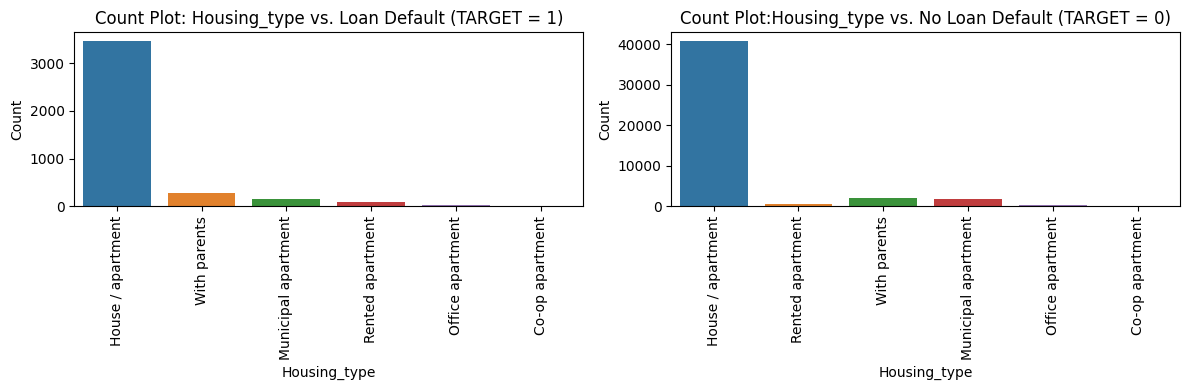

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 1], x='NAME_HOUSING_TYPE', ax=axes[0])
axes[0].set_xlabel('Housing_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Housing_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 0], x='NAME_HOUSING_TYPE', ax=axes[1])
axes[1].set_xlabel('Housing_type')
axes[1].set_ylabel('Count' )
axes[1].set_title('Count Plot:Housing_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

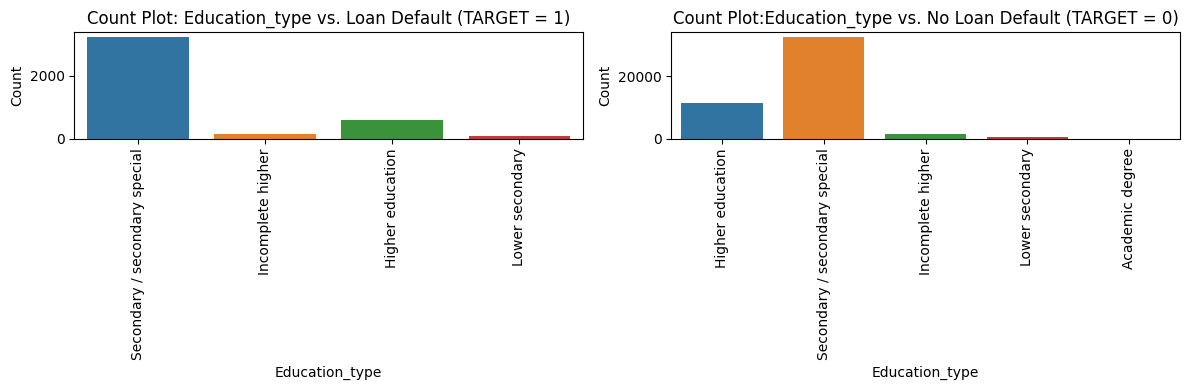

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 1], x='NAME_EDUCATION_TYPE', ax=axes[0])
axes[0].set_xlabel('Education_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Education_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 0], x='NAME_EDUCATION_TYPE', ax=axes[1])
axes[1].set_xlabel('Education_type')
axes[1].set_ylabel('Count' )
axes[1].set_title('Count Plot:Education_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

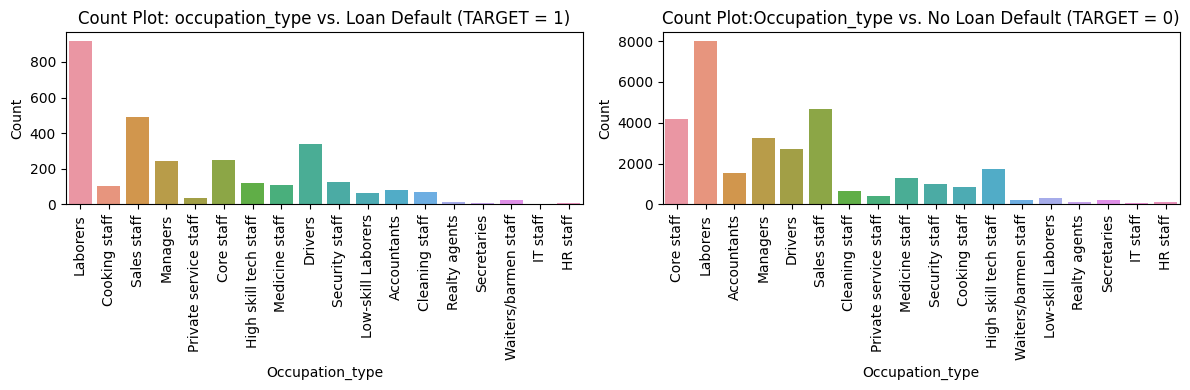

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0])
axes[0].set_xlabel('Occupation_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: occupation_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=application_data[application_data['TARGET'] == 0], x='OCCUPATION_TYPE', ax=axes[1])
axes[1].set_xlabel('Occupation_type')
axes[1].set_ylabel('Count' )
axes[1].set_title('Count Plot:Occupation_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Chi-square statistic: 127.00874065757918
p-value: 1.0260980033159492e-25


<Figure size 1000x600 with 0 Axes>

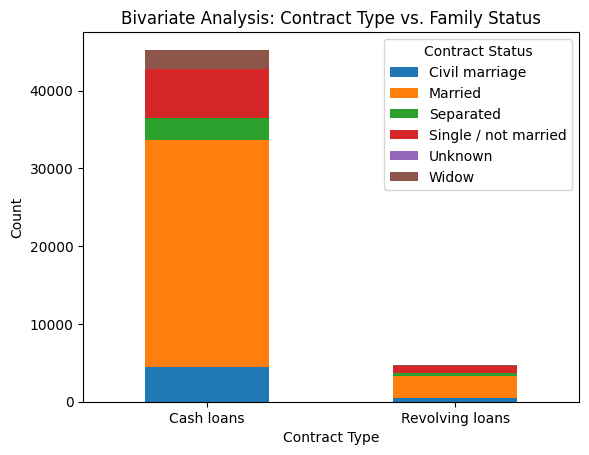

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the application_data.csv
application_data = pd.read_csv('application_data.csv')

# Filter the relevant columns
data = application_data[['NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS']]

# Create a contingency table
contingency_table = pd.crosstab(data['NAME_CONTRACT_TYPE'], data['NAME_FAMILY_STATUS'])

# Calculate the chi-square statistic and p-value for the correlation
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Bivariate Analysis: Contract Type vs. Family Status')
plt.xticks(rotation=0)
plt.legend(title='Contract Status')
plt.show()


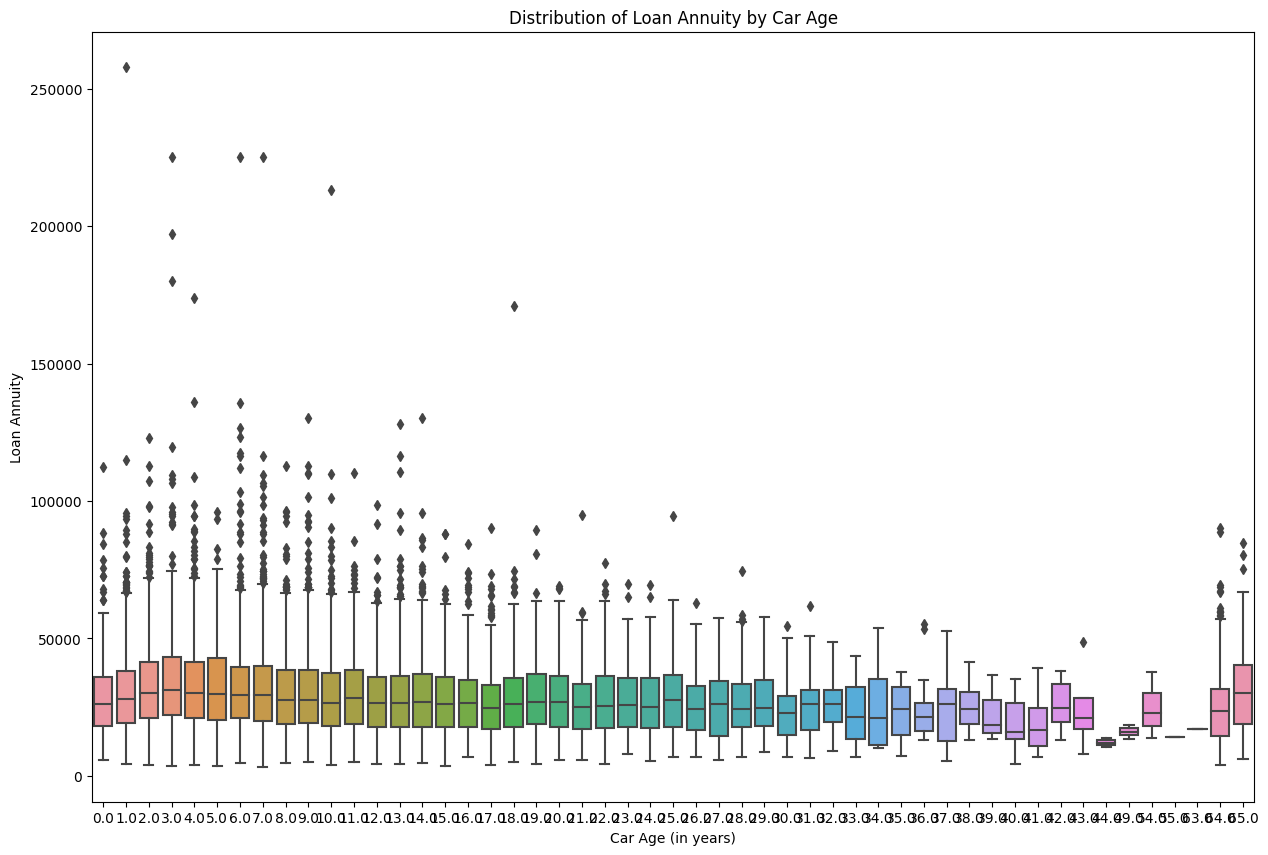

In [ ]:
# Create a box plot for a numerical variable
plt.figure(figsize=(15, 10))
sns.boxplot(x='OWN_CAR_AGE', y='AMT_ANNUITY', data=application_data)
plt.xlabel('Car Age (in years)')
plt.ylabel('Loan Annuity')
plt.title('Distribution of Loan Annuity by Car Age')
plt.show()


<ipython-input-49-ee1ae49d07f7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=application_data, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', ci=None)


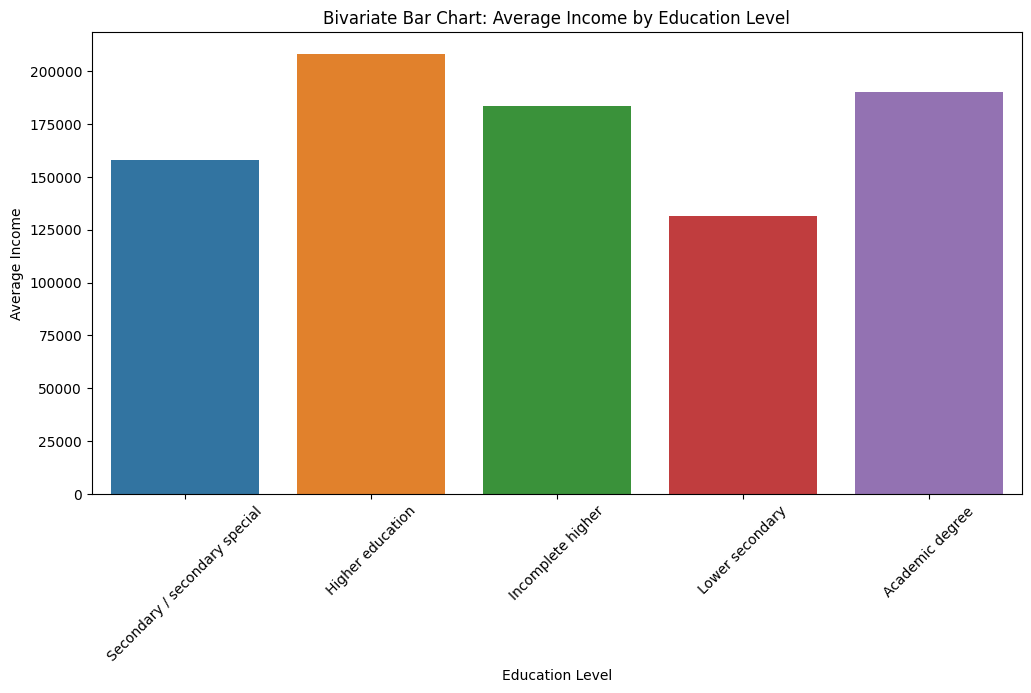

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=application_data, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', ci=None)
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.title('Bivariate Bar Chart: Average Income by Education Level')
plt.xticks(rotation=45)
plt.show()


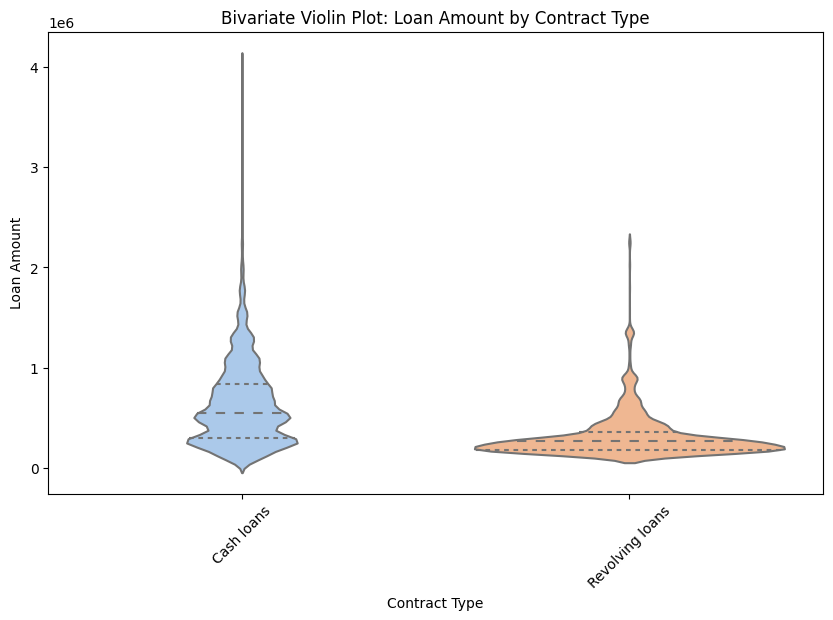

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=application_data, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', inner='quart', palette='pastel')
plt.xlabel('Contract Type')
plt.ylabel('Loan Amount')
plt.title('Bivariate Violin Plot: Loan Amount by Contract Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:


# Assuming your target variable is named 'TARGET' (1 for payment difficulties, 0 for no difficulties)
target_variable = 'TARGET'

# Select the relevant columns for correlation analysis
selected_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_CHILDREN', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']

# Split the dataset into two scenarios: payment difficulties (TARGET = 1) and all other cases (TARGET = 0)
payment_difficulties_data = application_data[application_data[target_variable] == 1]
other_cases_data = application_data[application_data[target_variable] == 0]

# Calculate correlations for both scenarios
payment_difficulties_correlations = payment_difficulties_data[selected_columns].corr()
other_cases_correlations = other_cases_data[selected_columns].corr()

# Find the top 10 correlations for payment difficulties
payment_difficulties_top_correlations = payment_difficulties_correlations.unstack().sort_values(ascending=False).drop_duplicates()
payment_difficulties_top_correlations = payment_difficulties_top_correlations[1:11]  # Exclude self-correlations

# Find the top 10 correlations for all other cases
other_cases_top_correlations = other_cases_correlations.unstack().sort_values(ascending=False).drop_duplicates()
other_cases_top_correlations = other_cases_top_correlations[1:11]  # Exclude self-correlations

# Print the top 10 correlations for each scenario
print("Top 10 Correlations for Clients with Payment Difficulties:")
print(payment_difficulties_top_correlations)
print("\nTop 10 Correlations for All Other Cases:")
print(other_cases_top_correlations)


Top 10 Correlations for Clients with Payment Difficulties:
AMT_GOODS_PRICE  AMT_CREDIT         0.982432
CNT_FAM_MEMBERS  CNT_CHILDREN       0.892522
AMT_GOODS_PRICE  AMT_ANNUITY        0.749705
AMT_ANNUITY      AMT_CREDIT         0.749665
CNT_CHILDREN     DAYS_BIRTH         0.249673
DAYS_ID_PUBLISH  DAYS_BIRTH         0.247897
CNT_FAM_MEMBERS  DAYS_BIRTH         0.199141
                 AMT_ANNUITY        0.075838
AMT_CREDIT       CNT_FAM_MEMBERS    0.061249
AMT_GOODS_PRICE  CNT_FAM_MEMBERS    0.055104
dtype: float64

Top 10 Correlations for All Other Cases:
AMT_GOODS_PRICE   AMT_CREDIT         0.987244
CNT_FAM_MEMBERS   CNT_CHILDREN       0.879239
AMT_GOODS_PRICE   AMT_ANNUITY        0.776142
AMT_ANNUITY       AMT_CREDIT         0.770773
AMT_INCOME_TOTAL  AMT_ANNUITY        0.451136
                  AMT_GOODS_PRICE    0.384675
                  AMT_CREDIT         0.377966
CNT_CHILDREN      DAYS_BIRTH         0.335876
CNT_FAM_MEMBERS   DAYS_BIRTH         0.284385
DAYS_ID_PUBLISH   DA

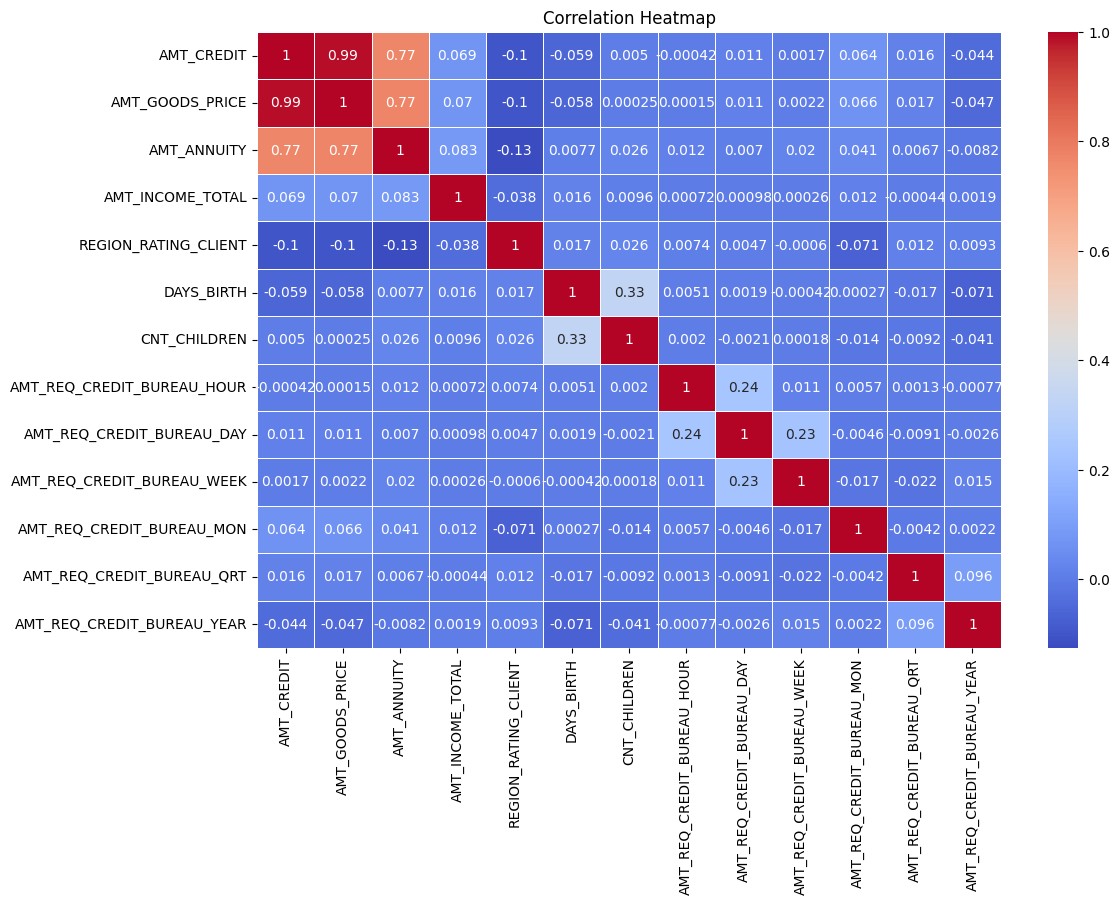

In [ ]:


# Select the columns of interest
selected_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT',
                    'DAYS_BIRTH', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR']

# Calculate the correlation matrix
correlation_matrix = application_data[selected_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-57-950fbe4183a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = application_data.corr()


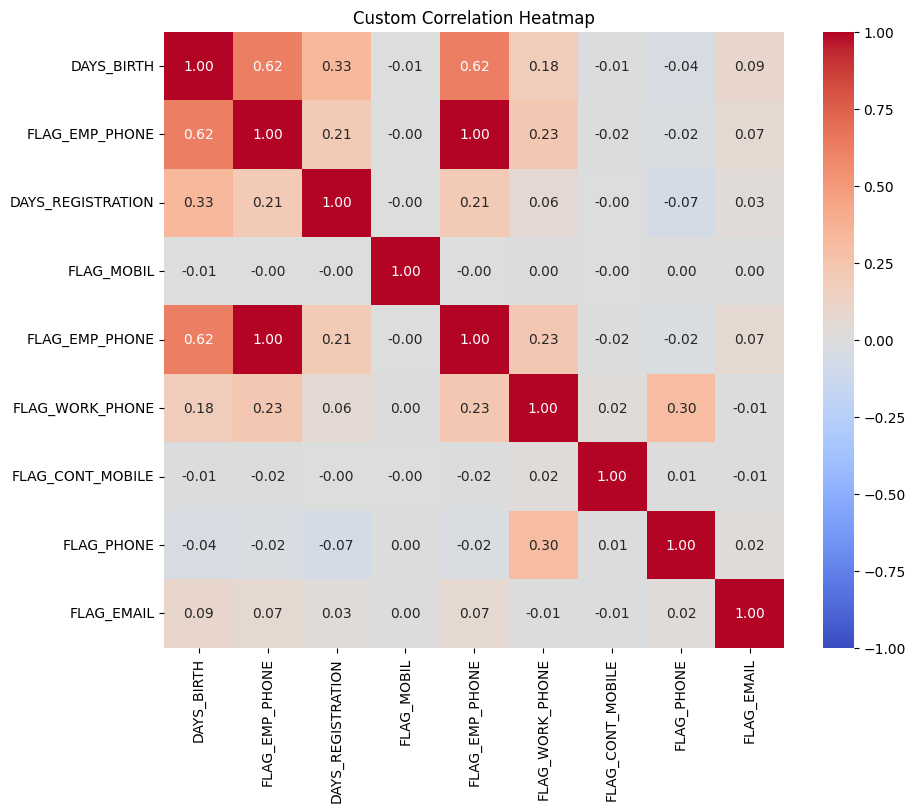

In [ ]:


# Calculate the correlation matrix
correlation_matrix = application_data.corr()

# Define the variables of interest
variables_of_interest = ['DAYS_BIRTH', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Create a customized heatmap for these variables
plt.figure(figsize=(10, 8))
heatmap_data = correlation_matrix.loc[variables_of_interest, variables_of_interest]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Custom Correlation Heatmap')
plt.show()


In [ ]:


# Define the scenarios you want to analyze (e.g., clients with payment difficulties and all other cases)
# Replace 'scenario_column_name' and 'scenario_value' with the appropriate column and value to define your scenario
# For example, if 'TARGET' values are 1 for clients with payment difficulties and 0 for others:
scenario_column_name = 'TARGET'
scenario_value = 1  # Change this value based on your scenario

# Calculate the correlation matrix for the entire dataset
correlation_matrix = application_data.corr()

# Filter the dataset based on the specified scenario
scenario_data = application_data[application_data[scenario_column_name] == scenario_value]

# Calculate the correlation matrix for the filtered scenario data
correlation_matrix_scenario = scenario_data.corr()

# Get the top correlations for the scenario
# You can choose a specific number (e.g., top_n = 10) or a threshold for correlation strength
top_n = 10
top_correlations = correlation_matrix_scenario['TARGET'].abs().sort_values(ascending=False)[1:top_n + 1]

print(f"Top {top_n} Correlations for the Scenario ({scenario_column_name} = {scenario_value}):")
print(top_correlations)


<ipython-input-59-b139a515dbab>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = application_data.corr()


Top 10 Correlations for the Scenario (TARGET = 1):
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
DAYS_REGISTRATION            NaN
Name: TARGET, dtype: float64


<ipython-input-59-b139a515dbab>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_scenario = scenario_data.corr()


In [ ]:
import numpy as np

# Calculate the correlation matrix
corr_defaulter = application_data.corr()

# Create a mask to select the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_defaulter, dtype=bool), k=1)

# Unstack the correlation matrix and reset the index
corr_df_defaulter = corr_defaulter.unstack().reset_index()

# Rename the columns
corr_df_defaulter.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop rows where the Correlation column is NaN
corr_df_defaulter.dropna(subset=["Correlation"], inplace=True)

# Sort the DataFrame by the absolute value of the Correlation column in descending order
corr_df_defaulter['Correlation'] = corr_df_defaulter['Correlation'].abs()
corr_df_defaulter.sort_values(by="Correlation", ascending=False, inplace=True)

# Get the top 16 correlations
top_16_corr_defaulter = corr_df_defaulter.head(16)

# Print the top 16 correlations
print(top_16_corr_defaulter)


<ipython-input-61-9da58c467e56>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_defaulter = application_data.corr()


                             VAR1                         VAR2  Correlation
0                      SK_ID_CURR                   SK_ID_CURR          1.0
107                        TARGET                       TARGET          1.0
3103                 EXT_SOURCE_1                 EXT_SOURCE_1          1.0
3210                 EXT_SOURCE_2                 EXT_SOURCE_2          1.0
3317                 EXT_SOURCE_3                 EXT_SOURCE_3          1.0
3424               APARTMENTS_AVG               APARTMENTS_AVG          1.0
3531             BASEMENTAREA_AVG             BASEMENTAREA_AVG          1.0
3638  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_AVG          1.0
3745              YEARS_BUILD_AVG              YEARS_BUILD_AVG          1.0
3852               COMMONAREA_AVG               COMMONAREA_AVG          1.0
3959                ELEVATORS_AVG                ELEVATORS_AVG          1.0
4066                ENTRANCES_AVG                ENTRANCES_AVG          1.0
4173        

In [ ]:
import pandas as pd

# Define the correlation function
def correlation(df):
  """Calculates the correlation matrix for a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A Pandas DataFrame containing the correlation matrix.
  """

  corr_matrix = df.corr()
  return corr_matrix

# Load the data
df = pd.read_csv('/content/application_data.csv')

# Calculate the correlation matrix
corr_matrix = correlation(df)

# Print the correlation table
print(corr_matrix)


<ipython-input-64-2baefac40575>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


                            SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000  0.003295      0.005538   
TARGET                        0.003295  1.000000      0.026364   
CNT_CHILDREN                  0.005538  0.026364      1.000000   
AMT_INCOME_TOTAL             -0.003014  0.010894      0.009589   
AMT_CREDIT                   -0.000732 -0.032428      0.004972   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.004272  0.011957     -0.002126   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.005880  0.005731      0.000181   
AMT_REQ_CREDIT_BUREAU_MON    -0.001156 -0.011356     -0.013533   
AMT_REQ_CREDIT_BUREAU_QRT    -0.003712 -0.000806     -0.009175   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.004468  0.023650     -0.041359   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.003014   -0.000732    -0.002084   
TARGET                              0.010894   -0.032428    -

In [ ]:
import pandas as pd
df = pd.read_csv('/content/application_data.csv')
corr_matrix = df.corr()
corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)
top_10_corr = corr_matrix.iloc[:10]
print(top_10_corr)


<ipython-input-65-401e11c19aae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


SK_ID_CURR                   SK_ID_CURR                     1.0
TARGET                       TARGET                         1.0
EXT_SOURCE_1                 EXT_SOURCE_1                   1.0
EXT_SOURCE_2                 EXT_SOURCE_2                   1.0
EXT_SOURCE_3                 EXT_SOURCE_3                   1.0
APARTMENTS_AVG               APARTMENTS_AVG                 1.0
BASEMENTAREA_AVG             BASEMENTAREA_AVG               1.0
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_AVG    1.0
YEARS_BUILD_AVG              YEARS_BUILD_AVG                1.0
COMMONAREA_AVG               COMMONAREA_AVG                 1.0
dtype: float64


In [ ]:
# Fill missing values with zeros for both target 0 and target 1 dataframes
df_target_0.fillna(0, inplace=True)
df_target_1.fillna(0, inplace=True)

# Recalculate correlations for both target 0 and target 1
correlations_target_0 = df_target_0.corr()
correlations_target_1 = df_target_1.corr()

# Top 10 correlated values for target 0 after filling missing values
top_correlations_target_0 = correlations_target_0['TARGET'].sort_values(ascending=False).head(10)

# Top 10 correlated values for target 1 after filling missing values
top_correlations_target_1 = correlations_target_1['TARGET'].sort_values(ascending=False).head(10)

# Print the results
print("Top 10 correlated values for target 0:")
print(top_correlations_target_0)

print("\nTop 10 correlated values for target 1:")
print(top_correlations_target_1)


<ipython-input-71-92c3f8c07bde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_0.fillna(0, inplace=True)
<ipython-input-71-92c3f8c07bde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_1.fillna(0, inplace=True)
<ipython-input-71-92c3f8c07bde>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_target_0 = df_target_0.corr()


Top 10 correlated values for target 0:
SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
Name: TARGET, dtype: float64

Top 10 correlated values for target 1:
SK_ID_CURR                   NaN
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
Name: TARGET, dtype: float64


<ipython-input-71-92c3f8c07bde>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_target_1 = df_target_1.corr()


In [ ]:
import pandas as pd

# Assuming you have two DataFrames for the two scenarios, e.g., df_target0 and df_target1

# Calculate the correlation matrix for scenario 1 (Target 0)
corr_matrix_target0 =application_data.corr()

# Calculate the correlation matrix for scenario 2 (Target 1)
corr_matrix_target1 =application_data.corr()

# Function to get top N correlations from a correlation matrix
def get_top_correlations(corr_matrix, N=10):
    unstacked_corr = corr_matrix.unstack()
    sorted_corr = unstacked_corr.sort_values(ascending=False)
    top_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)]
    return top_corr.head(N)

# Get and print the top 10 correlations for each scenario
top_correlations_target0 = get_top_correlations(corr_matrix_target0)
top_correlations_target1 = get_top_correlations(corr_matrix_target1)

print("Top 10 Correlations for Target 0:")
print(top_correlations_target0)

print("\nTop 10 Correlations for Target 1:")
print(top_correlations_target1)


<ipython-input-6-9ceb43a5a5bc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_target0 =application_data.corr()
<ipython-input-6-9ceb43a5a5bc>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_target1 =application_data.corr()


Top 10 Correlations for Target 0:
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG     0.999378
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.999378
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.998984
LIVINGAPARTMENTS_AVG      LIVINGAPARTMENTS_MEDI       0.998984
LANDAREA_AVG              LANDAREA_MEDI               0.998972
LANDAREA_MEDI             LANDAREA_AVG                0.998972
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998814
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998814
COMMONAREA_AVG            COMMONAREA_MEDI             0.998792
COMMONAREA_MEDI           COMMONAREA_AVG              0.998792
dtype: float64

Top 10 Correlations for Target 1:
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG     0.999378
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.999378
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.998984
LIVINGAPARTMENTS_AVG      LIVINGAPARTMENTS_MEDI       0.998984
LANDAREA_AVG              LANDAREA